In [15]:
import glob
import pandas as pd
# import re
from datetime import datetime, timedelta
import numpy as np
import os
import pymap3d as pm
import matplotlib.pyplot as plt

sample_time = 1
range_error = 25

def dellfiles(file):
    py_files = glob.glob(file)
    err = 0
    for py_file in py_files:
        try:
            os.remove(py_file)
        except OSError as e:
            print(f"Error:{e.strerror}")
            err = e.strerror
    return err

def diff1(x, dt):
    ddt = np.zeros(len(x))
    for i in range(1,len(x)-1):
        ddt[i] = (x[i+1] - x[i-1] )/(2*dt)
    return ddt

def diff2(x, dt):
    d2dt = np.zeros(len(x))
    for i in range(1,len(x)-1):
        d2dt[i] = (x[i+1] -2*x[i] + x[i-1] )/(dt**2)
    return d2dt

def diff24(x, dt):
    d2dt = np.zeros(len(x))
    for i in range(2,len(x)-2):
        d2dt[i] = (-x[i-2] + 16*x[i-1] -30*x[i] + 16*x[i+1] -x[i+2] )/(12*dt**2)
    return d2dt

In [16]:
txt_files = glob.glob('input/*.trn')
print(txt_files)
dellfiles('output/*.csv')

['input/obj-15202-2022_09_27-H0-17_09_03TU.trn', 'input/obj-14373-2022_09_27-H0-18_19_20TU.trn', 'input/obj-2142-2022_09_27-H0-14_34_17TU.trn', 'input/obj-3598-2022_09_27-H0-17_03_28TU.trn', 'input/obj-3230-2022_09_27-H0-12_23_28TU.trn', 'input/obj-13553-2022_09_27-H0-17_12_29TU.trn', 'input/obj-16882-2022_09_27-H0-16_36_23TU.trn', 'input/obj-12988-2022_09_27-H0-17_53_16TU.trn', 'input/obj-15772-2022_09_27-H0-16_47_04TU.trn', 'input/obj-17192-2022_09_27-H0-17_49_44TU.trn', 'input/obj-11267-2022_09_27-H0-15_47_42TU.trn', 'input/obj-16720-2022_09_27-H0-18_09_42TU.trn', 'input/obj-16496-2022_09_27-H0-14_02_09TU.trn', 'input/obj-12465-2022_09_27-H0-12_10_56TU.trn']


0

In [30]:
for file_name in txt_files:
    enu_xyz = pd.read_csv(file_name,skiprows=[0,1], header=None).to_numpy()
    enu_azelr = np.transpose(pm.enu2aer(enu_xyz[:,0],enu_xyz[:,1],enu_xyz[:,2]))
    
# Aceleração:
    # Range 2pt
    range_dff2 = diff2(enu_azelr[:,2], sample_time)   
    range_band = np.sqrt(np.abs(range_dff2/range_error))

    # Range 4pt
    range_dff24 = diff24(enu_azelr[:,2], sample_time)   
    range_band4 = np.sqrt(np.abs(range_dff24/range_error))

    range_dff2_np = np.diff(enu_azelr[:,2], n=2) / sample_time

    # Azimute 2pt
    az_dff2 = diff2(enu_azelr[:,0], sample_time)   
    az_band = np.sqrt((1000*np.pi/180)*np.abs(az_dff2/range_error))

    # Azimute 4pt
    az_dff24 = diff24(enu_azelr[:,0], sample_time)   
    az_band4 = np.sqrt((1000*np.pi/180)*np.abs(az_dff24/range_error))

    # Elev 2pt
    el_dff2 = diff2(enu_azelr[:,1], sample_time)   
    el_band = np.sqrt((1000*np.pi/180)*np.abs(el_dff2/range_error))

    # Elev 4pt
    el_dff24 = diff24(enu_azelr[:,1], sample_time)   
    el_band4 = np.sqrt((1000*np.pi/180)*np.abs(el_dff24/range_error))

    band = np.empty((len(el_band),3))
    band[:,0] = az_band
    band[:,1] = el_band
    band[:,2] = range_band

    df = pd.DataFrame(band)
    df.to_csv( 'out.csv', index=False, header=['az_band','el_band','r_band'],float_format="%.3f")

# Velocidade
    range_dff = diff1(enu_azelr[:,2], sample_time)
    range_dff_np = np.diff(enu_azelr[:,2]) / sample_time

    


    # print(band)
    break

In [18]:
time_array = np.linspace(0 , len(band),len(band)) 

## Velocidades

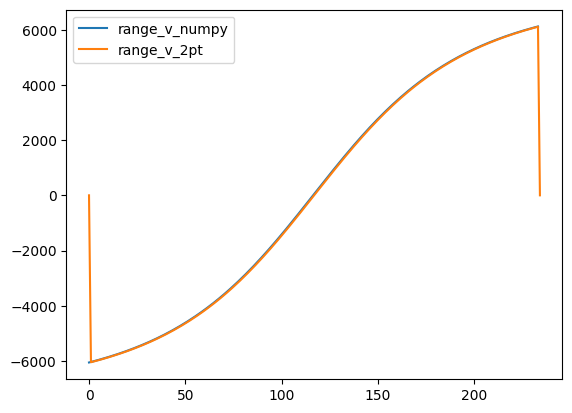

In [38]:

plt.plot(time_array[0:len(time_array)-1], range_dff_np, label="range_v_numpy")
plt.plot(time_array, range_dff, label="range_v_2pt")

plt.legend(loc="upper left")
plt.show()

## Bandas

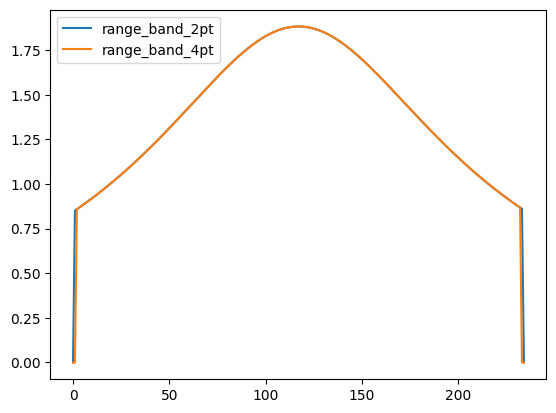

In [11]:
plt.plot(time_array, range_band, label="range_band_2pt")
plt.plot(time_array, range_band4, label="range_band_4pt")

plt.legend(loc="upper left")
plt.show()

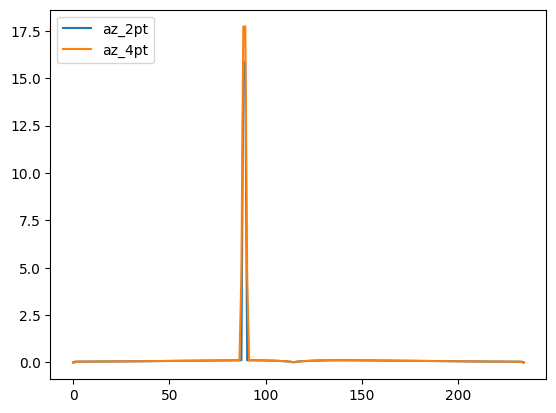

In [12]:
plt.plot(time_array, az_band, label="az_2pt")
plt.plot(time_array, az_band4, label="az_4pt")

plt.legend(loc="upper left")
plt.show()

## Segunda derivada

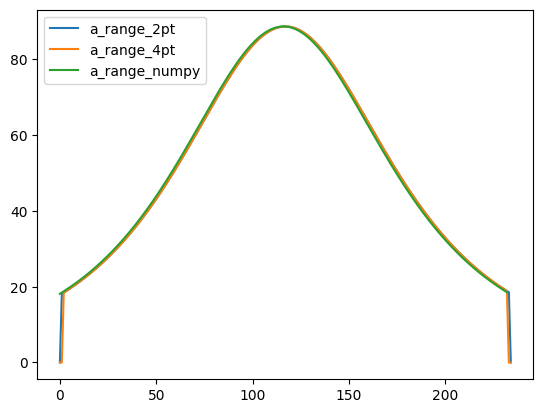

In [33]:
plt.plot(time_array, range_dff2, label="a_range_2pt")
plt.plot(time_array, range_dff24, label="a_range_4pt")
plt.plot(time_array[0:len(time_array)-2], range_dff2_np, label="a_range_numpy")

plt.legend(loc="upper left")
plt.show()

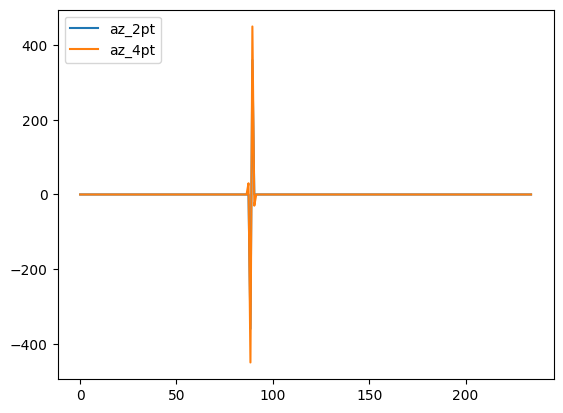

In [13]:
plt.plot(time_array, az_dff2, label="az_2pt")
plt.plot(time_array, az_dff24, label="az_4pt")

plt.legend(loc="upper left")
plt.show()